<h1>Malware Analysis for Potential Employer</h1>

In [1]:
import pandas as pd
import numpy as np

# import warnings library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import data
df = pd.read_csv('\\bots1.csv')
df.head()

,date,botfam,industry,hosts,orgs
0,6/1/2016,Bedep,Education,88,33
1,6/1/2016,Bedep,Finance,387,17
2,6/1/2016,Bedep,Government/Politics,430,42
3,6/1/2016,Bedep,Healthcare/Wellness,42,19
4,6/1/2016,Bedep,Manufacturing,184,18


In [2]:
df.dtypes

date        object
botfam      object
industry    object
hosts        int64
orgs         int64
dtype: object

In [3]:
df['botfam'].value_counts(dropna=False)

Sality         540
Ramnit         540
Zeus           540
ConfickerAB    540
zeroaccess     538
Bedep          535
Necurs         511
Zusy           498
PushDo         418
Olmasco        309
Name: botfam, dtype: int64

In [4]:
df['industry'].value_counts(dropna=False)

Manufacturing          895
Retail                 874
Education              820
Healthcare/Wellness    798
Government/Politics    793
Finance                789
Name: industry, dtype: int64

<h2>Which industry sees the most Ramnit infections? Least? </h2>

In [5]:
#filter the data for 'Ramnit'
ramnit = df.loc[df['botfam']=='Ramnit']
ramnit_sum = ramnit.groupby(['industry']).sum()
print("\tMost Ramnit Infections")
print(ramnit_sum.loc[ramnit_sum['hosts']==ramnit_sum.max()['hosts']].reset_index())
print("\n\n\tLeast Ramnit Infections")
print(ramnit_sum.loc[ramnit_sum['hosts']==ramnit_sum.min()['hosts']].reset_index())

	Most Ramnit Infections
        industry  hosts  orgs
0  Manufacturing  46303  1155


	Least Ramnit Infections
              industry  hosts  orgs
0  Healthcare/Wellness    544   473


<h2>Calculate the min, max, median and mean infected orgs across industries for each Bot family, sort by median </h2>


In [6]:
df.groupby(['botfam'],sort=False)['orgs'].agg([np.max,np.mean,np.min,np.median]).sort_values('median')

,amax,mean,amin,median
botfam,,,,
Olmasco,6,1.592233,1,1.0
PushDo,12,2.882775,1,2.0
Zusy,20,5.279116,1,4.0
zeroaccess,19,5.481413,1,5.0
Bedep,42,8.016822,1,6.0
Zeus,36,9.988889,1,8.0
Ramnit,60,14.703704,1,9.0
Necurs,115,16.739726,1,11.0
Sality,43,15.909259,2,12.0


<h2> Which date had the total most bot infections and how many infections on that day? </h2>

In [7]:
#Group by Date
date_group = df[['date','hosts']].groupby(['date'],sort=False).sum() 

#Find date with Maximum Infections
date_group.loc[date_group['hosts']==date_group.max()['hosts']]

,hosts
date,
6/2/2016,11352


<h2>Plot the daily infected hosts for Necurs, Ramnit and Pushdo</h2> 

In [8]:
#filter 'pushodo' bot values and then group by date
pushdo_datawise = df.loc[df['botfam']=='PushDo'][['date','hosts']].groupby(['date']).sum().reset_index()
#convert the 'date' from string format to date format
pushdo_datawise['date']=pd.to_datetime(pushdo_datawise['date'])
#sort the values of the date
x1 = pushdo_datawise.sort_values('date')
#plot date vs hosts
x1.plot(x = 'date', y= 'hosts')


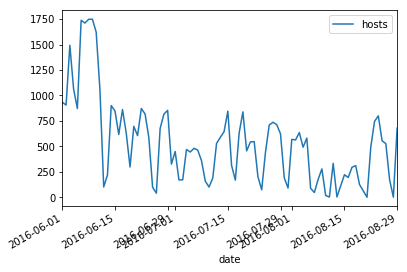

In [9]:
#filter 'necurs' bot values and then group by date
necurs_datawise = df.loc[df['botfam']=='Necurs'][['date','hosts']].groupby(['date']).sum().reset_index()
#convert the 'date' from string format to date format
necurs_datawise['date']=pd.to_datetime(necurs_datawise['date'])
#sort the values of the date
x2 = necurs_datawise.sort_values('date')
#plot date vs hosts
x2.plot(x = 'date', y= 'hosts') 

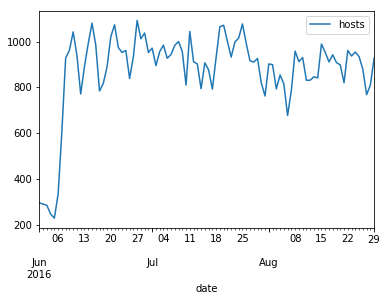

In [10]:
#filter 'necurs' bot values and then group by date
ramnit_datawise = df.loc[df['botfam']=='Ramnit'][['date','hosts']].groupby(['date']).sum().reset_index()
#convert the 'date' from string format to date format
ramnit_datawise['date']=pd.to_datetime(ramnit_datawise['date'])
#sort the values of the date
x3 = ramnit_datawise.sort_values('date')
#plot date vs hosts
x3.plot(x = 'date', y= 'hosts') 

<h2>Distribution of infected hosts for each day-of-week across all bot families </h2>

     weekday   hosts
0     Monday  108870
1    Tuesday  103015
2  Wednesday  109761
3   Thursday  108969
4     Friday  106934
5   Saturday   87358
6     Sunday   82222


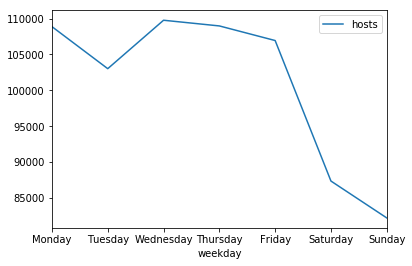

In [17]:
#group by date
date_agg = df.groupby('date', sort = False).sum()['hosts'].reset_index()

#convert the 'date' from string format to date format
date_agg['date'] = pd.to_datetime(date_agg['date'])

#get the name of the weekday for each date
date_agg['weekday'] = date_agg['date'].dt.weekday_name

#get the day number of the weekday for each date
date_agg['weekday_ind'] = date_agg['date'].dt.weekday

#group by weekday number/weekday
weekday_agg = date_agg.groupby(['weekday_ind','weekday']).sum().reset_index()
print(weekday_agg[['weekday','hosts']])

#plot weekday by hosts
weekday_agg.plot(x='weekday', y = 'hosts')